In [7]:
from feature import *
from load_cooll_data import get_cool_feature
from load_whited_data import *
from data import select_data_appliance_type, get_submetered_data, plaid_transform
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
import torch
from fit_functions import *
from metrics import *
from functools import partial
from fit import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from experiment_cross_dataset import *
from models import *
from visual_functions import *
import warnings
warnings.filterwarnings('ignore')
      
figure_path = "publications/image_enconding/img/"

In [3]:
data = "plaid"
current, voltage, label = get_data(datasets[data],data, submetered=True)

appliance 1:   0%|          | 0/13 [00:00<?, ?it/s]

Load plaid data from ../data/PLAID/


processed: 14: 100%|██████████| 13/13 [00:26<00:00,  2.02s/it]

currents size:250
labels size:250
states:250
voltage:250


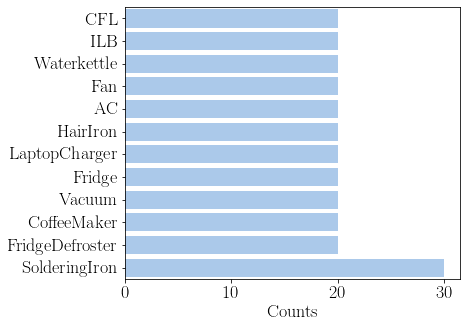

In [4]:
l, c = np.unique(label, return_counts=True)
volgorde = np.argsort(c)
fig, ax = plt.subplots(figsize=(6, 5))
sns.set_color_codes("pastel")
sns.barplot(x=c[volgorde], 
        y=np.array(apps["plaid_agg"])[volgorde], color='b')
ax.set_xlabel("Counts",fontsize=18)
ax.set_ylabel("",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
#savefig(figure_path+"label_dist_plaid_agg", format=".pdf")

In [33]:
fig = figure(fig_width=4)
i = current[0]
v = voltage[0]
plt.plot(i)
plt.ylabel("current $A$")
plt.xlabel("sample $T_s$")
savefig(figure_path+"current_sample", format=".pdf")

In [44]:
RP_binary = generalized_recurrent_plot(i[:,None], eps=0.01, delta=1, rp_type="delta")
fig = figure(fig_width=4)
plt.imshow(RP_binary, cmap="gray")
plt.ylabel("$H$")
plt.xlabel("$W$")
savefig(figure_path+"binary_recurrent_graph", format=".pdf")

In [45]:
RPi = generalized_recurrent_plot(i[:,None], eps=0.01, delta=10, rp_type="delta")
fig = figure(fig_width=4)
plt.imshow(RPi, cmap="gray")
plt.ylabel("$H$")
plt.xlabel("$W$")
savefig(figure_path+"weighted_recurrent_graph", format=".pdf")

In [92]:
fig = figure(fig_width=4)
VI = generateBinaryimage(v, i, 30, para=0.5, threshold=1)
plt.imshow(VI, cmap="gray")
plt.ylabel("$H$")
plt.xlabel("$W$")
savefig(figure_path+"vi_image", format=".pdf")

In [93]:
fig = figure(fig_width=4)
plt.plot(i,v)
plt.ylabel("current$A$")
plt.xlabel("voltage$V$")
plt.xlim(-180, 180)
savefig(figure_path+"vi_trajectory", format=".pdf")

## Dimension reduction

In [73]:
fig = figure(fig_width=4)
iaa = paa_segmentation(i, 30, True)
plt.plot(iaa)
plt.ylabel("current $A$")
plt.xlabel("sample $T_s$")
savefig(figure_path+"paa_current_sample", format=".pdf")


In [72]:
fig = figure(fig_width=4)
RPiaa=generalized_recurrent_plot(iaa[:,None], eps=0.01, delta=10, rp_type="delta")
plt.imshow(RPiaa, cmap="gray")
plt.ylabel("$H$")
plt.xlabel("$W$")
savefig(figure_path+"weighted_recurrent_graph_paa", format=".pdf")

In [66]:
def get_resized_image(img, size):
    if img.shape[-1]==1:
        img=img[:,:,0]
    img = PIL.Image.fromarray((img))
    img = img.resize((size, size),  PIL.Image.NORMAL)
    return  np.array(img)

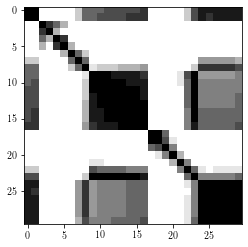

In [67]:
rp_reduced = get_resized_image(RPi, size=30)
plt.imshow(rp_reduced, cmap="gray")

In [ ]:
fig = figure(fig_width=4)
plt.imshow(RPi, cmap="gray")
savefig(figure_path+"recurrent_graph", format=".pdf")

In [ ]:
fig = figure(fig_width=4)
plt.imshow(MTFi, cmap="gray")
savefig(figure_path+"mtf_graph", format=".pdf")

In [ ]:
import pygsp
from pygsp import graphs, filters, features, plotting, utils, reduction

In [ ]:

#np.fill_diagonal(MTFi, 0)
Gi = graphs.Graph(MTFi, gtype='MTFi')
Gri = graphs.Graph(RPi, gtype='RPi')
#Grv = graphs.Graph(RPv, gtype='MTFv')


## Plot graph

In [ ]:
fig, axes = plt.subplots(1, 2)
Gri.set_coordinates()
_ = axes[0].spy(Gri.W)
Gri.plot(ax=axes[1])

In [ ]:
L=Gi.L
Gi.compute_fourier_basis()
Gi.set_coordinates()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for i, ax in enumerate(axes):
    Gi.plot_signal(Gi.U[:, i+1], vertex_size=30, ax=ax)
    _ = ax.set_title('Eigenvector {}'.format(i+2))
    ax.set_axis_off()
fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].matshow(MTFi)
axes[1].matshow(M)

In [ ]:
### Symetrical Graph
MTFs = MTFi + MTFi.T 
Gis = graphs.Graph(MTFs, gtype='MTFi')

fig, axes = plt.subplots(1, 2)
Gis.set_coordinates()
_ = axes[0].spy(Gis.W, markersize=2)
Gis.plot(ax=axes[1])

In [ ]:
sigma=0.1
G = graphs.NNGraph(X.T, NNtype='knn', k=5, sigma = sigma**2, rescale=True, symmetrize_type='maximum')

In [ ]:
print(G.N)
print(G.Ne)

In [ ]:
print(G.is_connected())
print(G.is_directed())

In [ ]:
plt.spy(G.W, markersize=5);
#plt.imshow(G.W.toarray());

In [ ]:
G.compute_laplacian('combinatorial') 
#G.compute_laplacian('normalized') ##the normalized Lap may yield an error if there exist a node with degree 0!
plt.imshow(G.L.toarray())

In [ ]:
v_in, v_out, weights = G.get_edge_list()
print(v_in.shape, v_out.shape, weights.shape)

In [ ]:
G.plot()

In [ ]:
## Spectrum
import scipy as sp
from additional_utils import AR_index, generate_concentric_circles
import networkx as nx
import sklearn
from sklearn.cluster import KMeans

In [ ]:
eig_val, U = sp.linalg.eigh(G.L.toarray()) 

In [ ]:
G_nx = nx.from_numpy_matrix(G.A.toarray())
#sorted(nx.connected_components(G_nx), key = len, reverse=True)

In [ ]:
### Smoothness and Divergence of a graph
G.compute_differential_operator()
gradient = G.D @ X.T
plt.plot(gradient[:,1])

In [ ]:
#compute the divergence of an edge signal, which is again a signal on the nodes
divergence = G.D.T @ gradient
G.plot_signal(divergence[:,1])

In [ ]:
#smoothness
smooth=(G.L.toarray()@ X.T)@X
plt.matshow(smooth)

In [ ]:
G.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(G.U[:, 4], ax=axes[0])
G.set_coordinates('line1D')
G.plot_signal(G.U[:, 1:4], ax=axes[1])
fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(15, 2.5))
G.compute_fourier_basis()

limits = [f(G.U[:, :len(axes)]) for f in (np.min, np.max)]

for i, ax in enumerate(axes):
    G.plot_signal(G.U[:, i], limits=limits, colorbar=False, vertex_size=50, ax=ax)
    ax.set_title(f'eigenvector $u_{i+1}$')
    ax.set_axis_off()

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(G.U))
plt.colorbar()
print('The largest entry in the Fourier basis is ' + str(np.max(np.abs(G.U))))

In [ ]:
taus = [0, 2, 5]
fig, axes = plt.subplots(len(taus), 2, figsize=(11, 6))

x0 = X[1]
for i, tau in enumerate(taus):
    g = filters.Heat(G, tau)
    x = g.filter(x0).squeeze()
    x_hat = G.gft(x).squeeze()
    
    G.plot_signal(x, ax=axes[i, 0])
    axes[i, 0].set_axis_off()
    axes[i, 0].text(0, -0.2, '$x^T L x = {:.2f}$'.format(x.T @ G.L @ x))
    
    axes[i, 1].plot(G.e, np.abs(x_hat), '.-')
    
    #g.plot(ax=axes[i, 2])
    #axes[i, 2].set_xlabel('')
    #axes[i, 2].set_ylabel('')
    
axes[0, 0].set_title(r'$x$: signal in the vertex domain')
axes[0, 1].set_title(r'$\hat{x}$: signal in the spectral domain')
#axes[0, 2].set_title('Filter applied to white noise')
axes[-1, 1].set_xlabel("laplacian's eigenvalues / graph frequencies")
#axes[-1, 2].set_xlabel("laplacian's eigenvalues / graph frequencies")

In [ ]:
x0 = X[1]
g = filters.MexicanHat(G)
x = g.filter(x0).squeeze()
x_hat = G.gft(x).squeeze()
s = g.localize(G.N // 2)
fig, axes = plt.subplots(1, 2)
G.plot_signal(x, ax=axes[0])
axes[0].set_axis_off()
axes[1].plot(G.e, np.abs(x_hat), '.-');
axes[0].set_title(r'$x$: signal in the vertex domain')
axes[1].set_title(r'$\hat{x}$: signal in the spectral domain');
#axes[0].text(0, -0.2, '$x^T L x = {:.2f}$'.format(x.T @ G.L @ x))
#g.plot(ax=axes[0])
#G.plot_signal(s, ax=axes[1])

In [ ]:
G.compute_fourier_basis()
# The mexican hat bandpass example
mex_hat = lambda x: x * np.exp(-x) 
plt.plot(np.arange(0,10,0.01), mex_hat(np.arange(0,10,0.01)))

In [ ]:
m=5
g = filters.MexicanHat(G, Nf = m + 1, lpfactor = 50)
eval_x = np.arange(0, G.lmax, G.lmax/1000)
y = g.evaluate(eval_x)

plt.plot(eval_x, y.T)
plt.plot(G.e, g.evaluate(G.e).T, '+')
plt.xlabel('$\lambda$')
plt.ylabel('filters')
plt.figure()
plt.plot(G.e, np.sum(np.power(g.evaluate(G.e).T,2),1), '+')
plt.ylim([0, 1])

In [ ]:
node = 10
delta_node = np.zeros((G.N,))
delta_node[node] = 1
wavelet_at_node = g.filter(delta_node)
wavelet_at_node.shape


G.plot_signal(delta_node) # the delta signal centered on 'node'
G.plot_signal(wavelet_at_node[:,5]) # the wavelet centered on 'node' at very small scale (large value of s)
G.plot_signal(wavelet_at_node[:,4]) # the wavelet at the same node but at slightly larger scale (smaller value of s)
G.plot_signal(wavelet_at_node[:,3]) # etc.
G.plot_signal(wavelet_at_node[:,2])
G.plot_signal(wavelet_at_node[:,1])

## Graph features
Divergence:
    from Jupyt

In [ ]:
plt.matshow(G.W.toarray())

In [ ]:
lists = np.arange(len(current))
np.random.shuffle(lists)
mtf = MarkovTransitionField(image_size=50, strategy="quantile", n_bins=50, overlapping=True)
from IPython import display
for k in lists:

    sigma=1
    i = current[k][:,None]
    v = voltage[k][:,None]
    X = np.vstack([paa_segmentation(v,50),paa_segmentation(i, 50)])
    G = graphs.NNGraph(X.T, NNtype='knn', k=10, sigma = sigma**2, rescale=False,epsilon=0.001, symmetrize_type='maximum')
    
    #MTFi =  mtf.fit_transform(i.T)[0]
    #MTFv =  mtf.fit_transform(v.T)[0]
    #np.fill_diagonal(MTFi, 0)
    #G = graphs.Graph(MTFi, gtype='MTFi')
    gn = nx.Graph(G.W.toarray())
    #G.compute_differential_operator()
    G.compute_fourier_basis()
    #gradient = G.D @ X.T
    #divergence = G.D.T @ gradient
    avg_adj=features.compute_avg_adj_deg(G)
    basis_function=G.U
    spec=features.compute_spectrogram(G, M=20)
    fig, axes = plt.subplots(1, 4)
    G.plot(ax=axes[1])
    axes[2].imshow(spec)
    axes[0].set_title(label[k])
    axes[0].plot(X[0], X[1])
    axes[3].imshow(G.W.toarray())
    plt.show()
    input("Enter")
    display.clear_output()



In [ ]:
skf = StratifiedKFold(n_splits=3, random_state=0)
    
k = 1
for train_index, test_index in  skf.split(images, y):
    #file_name=exp_name+"_"+str(k)
    #print(f"fit model for {file_name}")
    Xtrain, Xtest, ytrain, ytest = images[train_index], images[test_index], y[train_index], y[test_index]
    loaders=get_loaders(Xtrain, Xtest, ytrain, ytest, batch_size=64)
    k+=1
    if k==2:
        break

In [ ]:
### Model
import sys
sys.path.append("waveletconv/")
from common import *
from mwcnn_ import *

import os
from importlib import import_module

import torch
import torch.nn as nn
from torch.autograd import Variable
def iwt_init(x):
    r = 1
    in_batch, in_channel, in_height, in_width = x.size()
    #print([in_batch, in_channel, in_height, in_width])
    out_batch, out_channel, out_height, out_width = in_batch, int(
        in_channel / (r ** 2)), r * in_height, r * in_width
    x1 = x[:, 0:out_channel, :, :] / 2
    x2 = x[:, out_channel:out_channel * 2, :, :] / 2
    x3 = x[:, out_channel * 2:out_channel * 3, :, :] / 2
    x4 = x[:, out_channel * 3:out_channel * 4, :, :] / 2
    

    h = torch.zeros([out_batch, out_channel, out_height, out_width]).float()
    if torch.cuda.is_available():
        h=h.cuda()

    h[:, :, 0::2, 0::2] = x1 - x2 - x3 + x4
    h[:, :, 1::2, 0::2] = x1 - x2 + x3 - x4
    h[:, :, 0::2, 1::2] = x1 + x2 - x3 - x4
    h[:, :, 1::2, 1::2] = x1 + x2 + x3 + x4

    return h

class IWT(nn.Module):
    def __init__(self):
        super(IWT, self).__init__()
        self.requires_grad = False

    def forward(self, x):
        return iwt_init(x)

class Model(nn.Module):
    def __init__(self, scale=2, self_ensemble=True, chop=True, precision="half", model='BSR', 
                 n_resblocks=2, n_feats=4, nColor=1):
        super(Model, self).__init__()
        print('Making model...')

        self.scale = scale
        self.idx_scale = 0
        self.self_ensemble = self_ensemble
        self.chop = chop
        self.precision = precision
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.wvcnn = MWCNN(n_resblocks, n_feats, nColor)


import  common_ as common
import torch
import torch.nn as nn
import scipy.io as sio


class MWCNN(nn.Module):
    def __init__(self, n_resblocks=2, n_feats=8, nColor=1, conv=common.default_conv):
        super(MWCNN, self).__init__()
        kernel_size = 3
        self.scale_idx = 0
       

        act = nn.ReLU(True)

        self.DWT = common.DWT()
        self.IWT = common.IWT()

        n = 1
        m_head = [common.BBlock(conv, nColor, n_feats, kernel_size, act=act)]
        d_l0 = [common.BBlock(conv, n_feats, n_feats*2, kernel_size, act=act, bn=False)]
        d_l1 = [common.BBlock(conv, n_feats*8 , n_feats*2 , kernel_size, act=act, bn=False)]
        pro_l0=[common.BBlock(conv, n_feats * 8, n_feats*8 , kernel_size, act=act, bn=False)]
        i_l1 = [common.BBlock(conv, n_feats*2, n_feats*8 , kernel_size, act=act, bn=False)]
        i_l0 = [common.BBlock(conv, n_feats*2, n_feats*2, kernel_size, act=act, bn=False)]
        m_tail = [conv(n_feats*2, nColor, kernel_size)]

        self.head = nn.Sequential(*m_head)
        self.d_l1 = nn.Sequential(*d_l1)
        self.d_l0 = nn.Sequential(*d_l0)
        self.tail = nn.Sequential(*m_tail)
        self.i_l1 = nn.Sequential(*i_l1)
        self.i_l0 = nn.Sequential(*i_l0)
        self.pro_l0 = nn.Sequential(*pro_l0)

    def forward(self, x):
        x0 = self.d_l0(self.head(x))
        print(x0.shape)
        x1 = self.d_l1(self.DWT(x0))
        print(x1.shape)
        x1=F.interpolate(input=x1, size=x1.size(-1)*2)
        x_ = self.IWT(self.pro_l0(self.DWT(x1)))+x1
        print(x_.shape)
        x_ = self.IWT(self.i_l1(x_)) + F.interpolate(input=x0, size=x0.size(-1)*2)
        print(x_.shape)
        x_ = self.tail(self.i_l0(x_))
        x_=F.interpolate(input=x_, size=x_.size(-1)//2) +x
        print(x_.shape)


        return x

    def set_scale(self, scale_idx):
        self.scale_idx = scale_idx

model = MWCNN(n_resblocks=2, n_feats=8, nColor=1, conv=common.default_conv)
model

In [ ]:
z, y=next(iter(loaders['train']))
x=z
B, H, W, C = x.size()
x=x.view(B, C, H, W)
k=model(x)

In [ ]:

x0 = model.d_l0(model.head(x))
print(x0.shape)
x1 = model.d_l1(model.DWT(x0))
print(x1.shape)
x1=F.interpolate(input=x1, size=x1.size(-1)*2)
x_ = model.IWT(model.pro_l0(model.DWT(x1)))+x1
print(x_.shape)
x_ = model.IWT(model.i_l1(x_)) + F.interpolate(input=x0, size=x0.size(-1)*2)
print(x_.shape)
x_ = model.tail(model.i_l0(x_))
x_=F.interpolate(input=x_, size=x_.size(-1)//2) +x
print(x_.shape)


In [ ]:
x_ = model.tail(model.i_l0(x_))
x_=F.interpolate(input=x_, size=x_.size(-1)//2) +x
print(x_.shape)

In [ ]:
x1 = model.wvcnn.d_l1(model.wvcnn.DWT(out))
x2 = model.wvcnn.d_l2(model.wvcnn.DWT(x1))

In [ ]:
out.shape

In [ ]:
plt.imshow(z[0][:, :,0])

In [ ]:
plt.imshow(x1[0].data.numpy()[0])

In [ ]:
def train_model(current, voltage, labels, dataset, image_type, width=30, rp_type="delta", model_name="CNN", epochs=2):
    images = get_images(current, voltage,  width=width,image_type=image_type, 
                        eps=eps[dataset], steps=steps[dataset], distance='euclidean', rp_type=rp_type)
    images = images.astype(np.uint8)/255
    
    i_max = current.max(1)
    
    le = LabelEncoder()
    le.fit(labels)
    y = le.transform(labels)
    
    standard_scaler = StandardScaler()
    standard_scaler.fit(i_max[:, None])
    I_max = standard_scaler.transform(i_max[:, None])
    classes=list(np.unique(y))
    num_class=len(classes)
    
    y_pred_total = []
    f_1_total = []
    y_test_total = []
    img_test_total = []
    
    
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    metric_fn = partial(get_accuracy)
    exp_name=f"{dataset}_{image_type}_{str(width)}_{rp_type}_{model_name}"
    
    skf = StratifiedKFold(n_splits=4, random_state=0)
    
    k = 1
    for train_index, test_index in  skf.split(images, y):
        file_name=exp_name+"_"+str(k)
        print(f"fit model for {file_name}")
        Xtrain, Xtest, ytrain, ytest = images[train_index], images[test_index], y[train_index], y[test_index]
        loaders=get_loaders(Xtrain, Xtest, ytrain, ytest, batch_size=64)
        model = CNN(out_size=num_class)
        saved_model_path   = 'models/{}_checkpoint.pt'.format(file_name)
        checkpoint = Checkpoint(saved_model_path, patience=20, checkpoint=True, score_mode="max",min_delta=1e-4)
        criterion = torch.nn.CrossEntropyLoss().to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)
        train_loss, train_acc,  test_loss, test_acc = perform_training(epochs, 
                                                                   model, 
                                                                   loaders['train'],
                                                                   loaders['val'],
                                                                   optimizer, 
                                                                   criterion, 
                                                                   device, 
                                                                   checkpoint,
                                                                   metric_fn)
        pred, test= predict(model, loaders['val'], checkpoint, device,1, 0.5, singlelabel=True)
        plot_learning_curve(train_loss, train_acc, test_loss, test_acc)
        savefig(f"figure/temp/{file_name}",format=".pdf")
        
        f1 = get_fscore(test, pred, dataset)
        f_1_total.append(f1)
        y_pred_total.append(pred)
        y_test_total.append(test)
        img_test_total.append(Xtest)
        k+=1
        
    np.save(f"results/{file_name}_pred.npy", np.vstack(y_pred_total))
    np.save(f"results/{file_name}_f1.npy", np.vstack(f_1_total))
    np.save(f"results/{file_name}_true.npy", np.vstack(y_test_total))
    np.save(f"results/{file_name}_images.npy", np.vstack(img_test_total))
    
    vis_results(y_test_total, y_pred_total, dataset, fig_path=f"figure/{file_name}")
    
       
        
        
       
    return images

In [ ]:
images=train_model(current, voltage, label, "cooll", "vi", width=30, rp_type="delta")

In [ ]:
plt.imshow(k.data.numpy()[0][0])

In [ ]:
plt.imshow(z.numpy()[0][:,:,0])

In [ ]:
images.max()

In [ ]:
img = generalized_recurrent_plot(current[0], 0.001, 30, 'euclidean', "gafs")
#img = generateBinaryimage(current[10], voltage[10],30)
img = rescale_image(img)

In [ ]:
plt.matshow(img)

In [ ]:
img = get_resized_image(img, 30)


In [ ]:
plt.matshow(img)